In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Añadir columna décadas

In [3]:
df = pd.read_csv('../estaeslabuena/1-pelis.csv')

In [4]:
df.head()

,id_peli,titulo,año,pais,tipo,puntuacion,votos
0,0,Fahrenheit 9/11,2004,Estados Unidos,Película,6.99,69775
1,1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704
2,2,La última noche,2002,Estados Unidos,Película,7.49,33793
3,3,Zeitgeist: The Movie,2007,Estados Unidos,Película,7.36,21808
4,4,United 93 (Vuelo 93),2006,Estados Unidos,Película,6.70,19146


In [10]:
df['decada'] = df['año'].apply(lambda x: x - int(str(x)[-1]))

In [11]:
df.head()

,id_peli,titulo,año,pais,tipo,puntuacion,votos,decada
0,0,Fahrenheit 9/11,2004,Estados Unidos,Película,6.99,69775,2000
1,1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010
2,2,La última noche,2002,Estados Unidos,Película,7.49,33793,2000
3,3,Zeitgeist: The Movie,2007,Estados Unidos,Película,7.36,21808,2000
4,4,United 93 (Vuelo 93),2006,Estados Unidos,Película,6.70,19146,2000


# Conexión con SQL - Actualización db

In [13]:
%load_ext sql

In [14]:
%sql sqlite:///../estaeslabuena/movies.db

'Connected: @../estaeslabuena/movies.db'

In [15]:
db_url = 'sqlite:///../estaeslabuena/movies.db'

In [16]:
df.to_sql('Pelis', db_url, if_exists='replace', index=False)

In [18]:
%%sql
-- # Comprobamos que se ha subido bien
select * from Pelis limit 3

 * sqlite:///../estaeslabuena/movies.db
Done.


id_peli,titulo,año,pais,tipo,puntuacion,votos,decada
0,Fahrenheit 9/11,2004,Estados Unidos,Película,6.99,69775,2000
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010
2,La última noche,2002,Estados Unidos,Película,7.49,33793,2000


## Top 10 actores más valorados por década

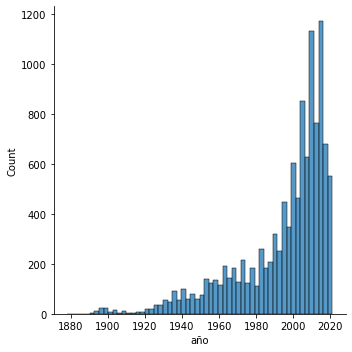

In [7]:
# Comprobamos la distribución de los años para ver a partir de qué década hay info relevante

_ = sns.displot(df.año) 

# Vemos que lo más adecuado es hacer los últimos 100 años desde 1920

In [19]:
%%sql

-- # 10 actores con media DE PELÍCULAS (no series) mejor valoradas de cada década
-- # Participación mínima en 5 películas

with tabaux3 as (
    
with tabaux2 as (

with tabaux as (
select pe.*, pa.id_act, ac.actor from Pelis pe
inner join 'Pelis-Actores' pa on pe.id_peli = pa.id_peli
inner join Actores ac on ac.id_act = pa.id_act
where ac.actor != 'Documental' and ac.actor != 'Animación' and pe.tipo == 'Película')

select decada, actor, round(avg(puntuacion), 2) as puntuacion, count(id_peli) as numpelis
from tabaux
group by actor, decada
having numpelis > 5
order by decada desc, puntuacion desc)

select *, dense_rank() over(partition by decada order by puntuacion desc) as rankdecada from tabaux2)

select * from tabaux3
where rankdecada < 11 and decada > 1919
order by decada desc, puntuacion desc

 * sqlite:///../estaeslabuena/movies.db
Done.


decada,actor,puntuacion,numpelis,rankdecada
2010,Leonardo DiCaprio,7.21,8,1
2010,Tom Hardy,6.77,11,2
2010,Christian Bale,6.76,8,3
2010,Benedict Cumberbatch,6.71,13,4
2010,John Hawkes,6.67,6,5
2010,Sarah Paulson,6.64,6,6
2010,Robin Wright,6.6,7,7
2010,Ricardo Darín,6.59,6,8
2010,Bruce Dern,6.59,6,8
2010,Mark Ruffalo,6.57,13,9


In [20]:
query1 = """with tabaux3 as (
    
with tabaux2 as (

with tabaux as (
select pe.*, pa.id_act, ac.actor from Pelis pe
inner join 'Pelis-Actores' pa on pe.id_peli = pa.id_peli
inner join Actores ac on ac.id_act = pa.id_act
where ac.actor != 'Documental' and ac.actor != 'Animación' and pe.tipo == 'Película')

select decada, actor, round(avg(puntuacion), 2) as puntuacion, count(id_peli) as numpelis
from tabaux
group by actor, decada
having numpelis > 5
order by decada desc, puntuacion desc)

select *, dense_rank() over(partition by decada order by puntuacion desc) as rankdecada from tabaux2)

select * from tabaux3
where rankdecada < 11 and decada > 1919
order by decada desc, puntuacion desc
"""

In [21]:
# La pasamos a .csv para manipular en Tableau

pd.read_sql(query1, db_url).to_csv('top10_act_punt.csv')

## Top 10 actores más populares por década

In [22]:
%%sql

-- # 10 actores con mayor número de votos en PELÍCULAS (no series) por década para medir la popularidad
-- # Participación mínima en 5 películas

with tabaux3 as (
    
with tabaux2 as (

with tabaux as (
select pe.*, pa.id_act, ac.actor from Pelis pe
inner join 'Pelis-Actores' pa on pe.id_peli = pa.id_peli
inner join Actores ac on ac.id_act = pa.id_act
where ac.actor != 'Documental' and ac.actor != 'Animación' and pe.tipo == 'Película')

select decada, actor, round(avg(votos), 2) as votos, count(id_peli) as numpelis
from tabaux
group by actor, decada
having numpelis > 5
order by decada desc, votos desc)

select *, dense_rank() over(partition by decada order by votos desc) as rankdecada from tabaux2)

select * from tabaux3
where rankdecada < 11 and decada > 1919
order by decada desc, votos desc

 * sqlite:///../estaeslabuena/movies.db
Done.


decada,actor,votos,numpelis,rankdecada
2010,Leonardo DiCaprio,83763.88,8,1
2010,Michael Caine,53132.56,9,2
2010,Tom Hardy,48151.18,11,3
2010,Cillian Murphy,44866.57,7,4
2010,Helena Bonham Carter,43640.9,10,5
2010,Marion Cotillard,43393.0,10,6
2010,Joseph Gordon-Levitt,42912.11,9,7
2010,Sebastian Stan,42829.0,8,8
2010,Michael Gambon,42630.83,6,9
2010,Max von Sydow,41999.17,6,10


In [23]:
query2 = """
with tabaux3 as (
    
with tabaux2 as (

with tabaux as (
select pe.*, pa.id_act, ac.actor from Pelis pe
inner join 'Pelis-Actores' pa on pe.id_peli = pa.id_peli
inner join Actores ac on ac.id_act = pa.id_act
where ac.actor != 'Documental' and ac.actor != 'Animación' and pe.tipo == 'Película')

select decada, actor, round(avg(votos), 2) as votos, count(id_peli) as numpelis
from tabaux
group by actor, decada
having numpelis > 5
order by decada desc, votos desc)

select *, dense_rank() over(partition by decada order by votos desc) as rankdecada from tabaux2)

select * from tabaux3
where rankdecada < 11 and decada > 1919
order by decada desc, votos desc"""

In [24]:
pd.read_sql(query2, db_url).to_csv('top10_act_voto.csv')

## Nº pelis por género - extracción .csv con películas (sin series, etc.)

Para visualizar la evolución del nº pelis por cada género, extraemos todas las pelis posteriores a 1920 cuyo tipo sea igual a 'Película' para evitar las series, documentales, etc.

In [36]:
%%sql
-- # Esta es la query que necesitamos (sin el limit 10)
select pe.*, ge.genero
    from Pelis pe
inner join 'Pelis-Genero' pg on pe.id_peli = pg.id_peli
inner join Genero ge on ge.id_gen = pg.id_gen
where tipo == 'Película' and año > 1919
order by id_peli asc
limit 10

 * sqlite:///../estaeslabuena/movies.db
Done.


id_peli,titulo,año,pais,tipo,puntuacion,votos,decada,genero
0,Fahrenheit 9/11,2004,Estados Unidos,Película,6.99,69775,2000,Documental
0,Fahrenheit 9/11,2004,Estados Unidos,Película,6.99,69775,2000,11-S
0,Fahrenheit 9/11,2004,Estados Unidos,Película,6.99,69775,2000,Guerra de Iraq
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,11-S
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Thriller
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Acción
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Drama
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Terrorismo
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Basado en hechos reales
2,La última noche,2002,Estados Unidos,Película,7.49,33793,2000,11-S


In [37]:
query3 = """select pe.*, ge.genero
    from Pelis pe
inner join 'Pelis-Genero' pg on pe.id_peli = pg.id_peli
inner join Genero ge on ge.id_gen = pg.id_gen
where tipo == 'Película' and año > 1919
order by id_peli asc
"""

In [38]:
pd.read_sql(query3, db_url).to_csv('pelisporgenero_post1920_noseries.csv')

### Lista de géneros más abundantes

In [39]:
# Sacamos el top 20 de géneros más abundantes que sean relevantes para la visualización

pelisporgenero = pd.read_sql(query3, db_url)

In [43]:
top20generos = pelisporgenero.value_counts('genero', ascending=False).head(20).index.to_list()
top20generos

['Drama',
 'Comedia',
 'Acción',
 'Thriller',
 'Aventuras',
 'Romance',
 'Terror',
 'Fantástico',
 'Documental',
 'Ciencia ficción',
 'Intriga',
 'Secuela',
 'Animación',
 'Crimen',
 'Basado en hechos reales',
 'Biográfico',
 'Película de culto',
 'Bélico',
 'Deporte',
 'Familia']

### Pivot table para ver la cantidad de pelis por género

In [48]:
genpiv = pelisporgenero[['genero', 'año', 'id_peli']].pivot_table(index='año', values='id_peli', columns='genero', aggfunc='count')
genpiv.tail()

genero,11-S,3-D,Abusos sexuales,Acción,Acoso escolar/bullying,Adolescencia,Adopción,Ajedrez,Alcoholismo,Alpinismo/Escalada,...,Western,Western futurista,Wrestling/Lucha libre,Wuxia,Yakuza & Triada,Young Adult,Zombis,eSports,África,Ópera
año,,,,,,,,,,,,,,,,,,,,,
2017,2.0,11.0,3.0,36.0,1.0,7.0,1.0,3.0,NaN,4.0,...,3.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
2018,1.0,7.0,1.0,43.0,NaN,9.0,6.0,NaN,3.0,2.0,...,2.0,NaN,3.0,1.0,2.0,5.0,1.0,NaN,3.0,1.0
2019,NaN,5.0,4.0,25.0,NaN,6.0,1.0,3.0,1.0,2.0,...,1.0,NaN,3.0,1.0,2.0,NaN,2.0,2.0,2.0,NaN
2020,NaN,2.0,1.0,13.0,1.0,3.0,NaN,NaN,2.0,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0,1.0,NaN
2021,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualización top 20 géneros en matplotlib

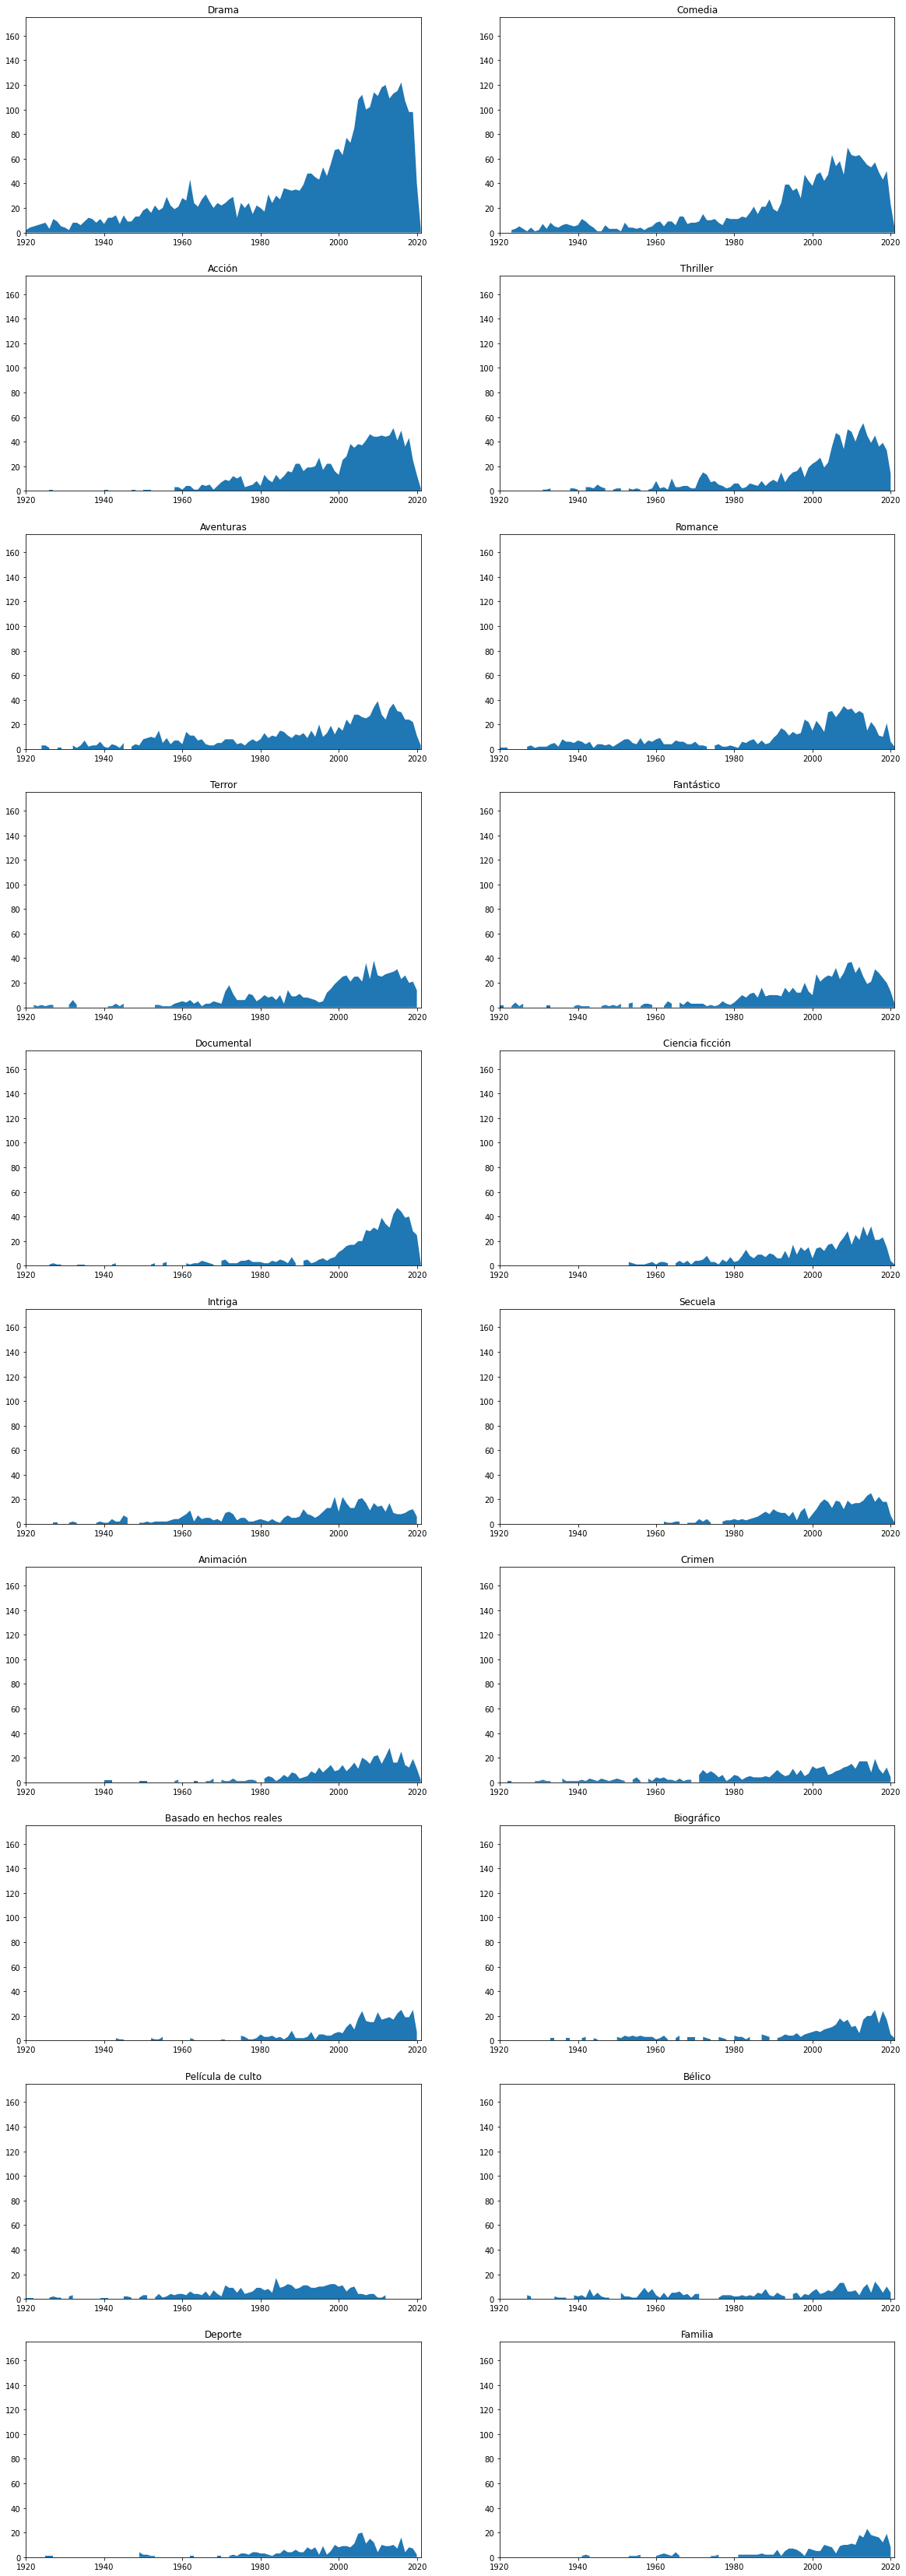

In [49]:
# Iteramos para ver las 20 gráficas sin tener que meterlas a mano

fig, ax = plt.subplots(10,2, figsize=(20,60))

for i in range(10):
    for j in range(2):
        currgen = top20generos.pop(0) # Con .pop() extrae el primer valor de la tabla y nos ahorramos otra iteración
        plt.sca(ax[i][j])
        plt.stackplot(genpiv.index, genpiv[currgen])
        plt.title(currgen)
        plt.xlim(1920,2021)
        plt.ylim(0, 175)

## Pelis por actor

Descargamos el .csv con las pelis por actor que también usaremos en Tableau

In [53]:
%%sql
-- # Esta es la query que necesitamos (sin el limit 10)
select pe.*, ac.actor
    from Pelis pe
inner join 'Pelis-Actores' pa on pe.id_peli = pa.id_peli
inner join Actores ac on ac.id_act = pa.id_act
where tipo == 'Película' and año > 1919 and actor != 'Documental' and actor != 'Animación'
order by id_peli asc
limit 10

 * sqlite:///../estaeslabuena/movies.db
Done.


id_peli,titulo,año,pais,tipo,puntuacion,votos,decada,actor
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Jessica Chastain
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Joel Edgerton
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Taylor Kinney
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Kyle Chandler
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Jennifer Ehle
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Mark Strong
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Chris Pratt
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,James Gandolfini
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Stephen Dillane
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Mark Duplass


In [54]:
query4 = '''
select pe.*, ac.actor
    from Pelis pe
inner join 'Pelis-Actores' pa on pe.id_peli = pa.id_peli
inner join Actores ac on ac.id_act = pa.id_act
where tipo == 'Película' and año > 1919 and actor != 'Documental' and actor != 'Animación'
order by id_peli asc'''

In [55]:
pd.read_sql(query4, db_url).to_csv('pelisporactor_post1920_noseries.csv')

## Scatter plot puntuación-votos

Con esta scatter plot podemos comprobar algo que quizás sea obvio, que cuanto más votos reciben las pelis, mayor probabilidad de que su puntuación media sea alta

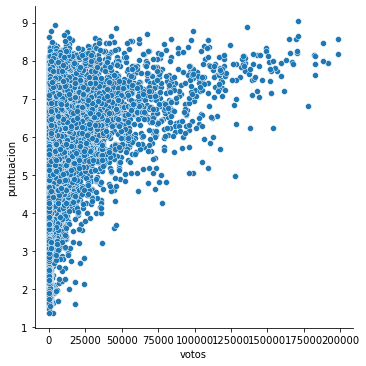

In [51]:
_ = sns.relplot(data=df, x='votos', y='puntuacion', kind='scatter')